# Sentinel Playground Temporal

A graphical interface to a complete and daily updated Sentinel-2 archive

Link: https://apps.sentinel-hub.com/sentinel-playground-temporal


### Activity 1:
- Go to Sentinel Playground
- Select a location (Philadelphia?)
- Display it in real color
- Display different color bands   

## Custom scripting, simple usage:

Playground provides a javascript based interface for visualization

### Activity 2:
- Select a location (Mount Etna)
- Display it using the following script:

return [
    B04 * 2.5 + Math.max(0, B12 - 0.1),
    B03 * 2.5 + Math.max(0, B11 - 0.1),
    B02 * 2.5
];

## Custom scripting, basic functions:

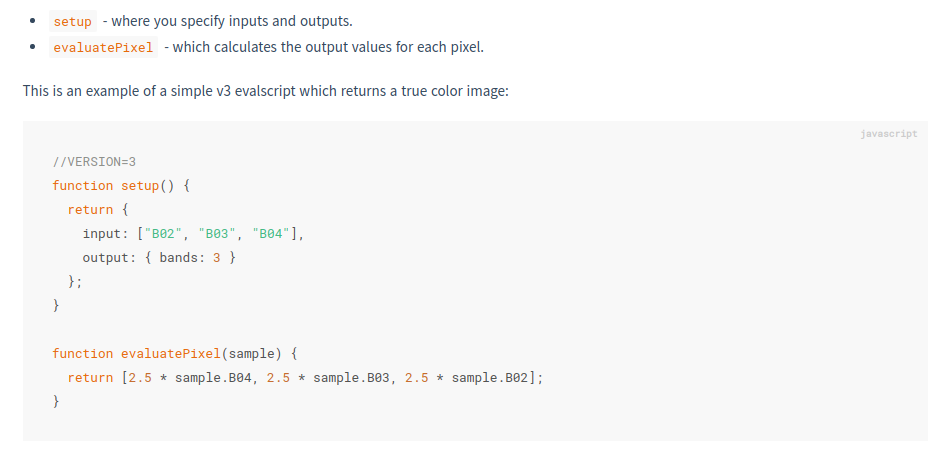

### Activity 3: Visualize Etna Eruption
- Select a location (Etna Parco Regio)
- Select a date (2017-03-16)
- Display it using the following script:



#### Simple script (True color)

In [ ]:
return [ B04 * 2.5, B03 * 2.5, B02 * 2.5 ];

#### Simple script (Highlight lava)

In [ ]:
return [ B12 * 2.5, B11 * 2.5, B04 * 2.5 ];

####  Custom script

In [ ]:
function setup(ds) {
    setInputComponents([ds.B02, ds.B03, ds.B04, ds.B11, ds.B12]);
    setOutputComponentCount(3);
}

let viz = new HighlightCompressVisualizerSingle(-1.0, 1.0);

function evaluatePixel(samples) {
    let val1 = samples[0].B04 * 2.5 + Math.max(0, samples[0].B12 - 0.1)
    let val2 = samples[0].B03 * 2.5 + Math.max(0, samples[0].B11 - 0.1)
    let val3 = samples[0].B02 * 2.5
    return [val1, val2, val3]; 
}

### Activity 4: Temporal visualization: Sydney, wildfires

#### Important: Activate temporal on the "effects pane"!

#### Setup function (set input/output)

In [ ]:
function setup (dss) {
  // get all bands for display and analysis
  setInputComponents([dss.B02,dss.B03,dss.B04,dss.B05,dss.B08,dss.B12]);
  // return as RGB
  setOutputComponentCount(3);
}

#### Stretch function (rescale values)

In [ ]:
function stretch(val, min, max) {return (val - min) / (max - min);}

#### filterScenes function (select multiple timepoints)

In [ ]:
function filterScenes (scenes, inputMetadata) {  
return scenes.filter(function (scene) {
// set dates for pre-and-post fire analysis
var allowedDates = ["2019-11-01","2019-12-26"]; // Australia fires  

// format scene date timestamp to match allowed dates 
var sceneDateStr = dateformat(scene.date);
if (allowedDates.indexOf(sceneDateStr)!= -1) return true;
else return false;
  });
}

function dateformat(d){  
  var dd = d.getDate();
  var mm = d.getMonth()+1;
  var yyyy = d.getFullYear();
  if(dd<10){dd='0'+dd}
  if(mm<10){mm='0'+mm}
  var isodate = yyyy+'-'+mm+'-'+dd;
  return isodate;
}

#### calcNBR function

In [ ]:
// Normalized Burn Ration calculation
function calcNBR(sample) {
  var denom = sample.B08+sample.B12;
  var nbrval = ((denom!=0) ? (sample.B08-sample.B12) / denom : 0.0);
  return nbrval;
}

#### evaluatePixel function

In [ ]:
function evaluatePixel(samples,scenes) {  
  var nbrpre = 0;
  var nbrpost = 0;  
  
  // get pre-fire image
  nbrpre = calcNBR(samples[1]);
  // get post-fire image
  nbrpost = calcNBR(samples[0]);  
  // get difference 
  var dnbr = nbrpre - nbrpost;
  // set output display layers
  var stretchMin = 0.05;
  var stretchMax = 1.00;
  var NaturalColors = [stretch(2.8 * samples[0].B04 + 0.1 * samples[0].B05, stretchMin, stretchMax), stretch(2.8 * samples[0].B03 + 0.15 * samples[0].B08, stretchMin, stretchMax), stretch(2.8 * samples[0].B02, stretchMin, stretchMax)];  
  var burnModerate = [stretch(2.8 * samples[0].B04 + 0.1 * samples[0].B05, stretchMin, stretchMax)+0.5, stretch(2.8 * samples[0].B03 + 0.15 * samples[0].B08, stretchMin, stretchMax)+0.5, stretch(2.8 * samples[0].B02, stretchMin, stretchMax)];  
  var burnSevere = [stretch(2.8 * samples[0].B04 + 0.1 * samples[0].B05, stretchMin, stretchMax)+0.5, stretch(2.8 * samples[0].B03 + 0.15 * samples[0].B08, stretchMin, stretchMax), stretch(2.8 * samples[0].B02, stretchMin, stretchMax)];
  return (dnbr < 0.27 ?
  NaturalColors : (dnbr < 0.66 ?
  burnModerate : burnSevere)
  ); 
}

## Sentinel Hub Custom Script Contest
https://sentinel-hub.com/contest